In [374]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import seaborn as sns
import yfinance
import warnings
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.stattools import adfuller
from pandas import Series
from pandas import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
warnings.filterwarnings("ignore")
sns.set()

In [375]:
stock_data= yfinance.download (tickers = "VOW3.DE, PAH3.DE, BMW.DE", interval = "1d", group_by = 'ticker',
                              auto_adjust = True, treads = True)

[*********************100%***********************]  3 of 3 completed


In [376]:
df= stock_data.copy()

In [377]:
df.head()

PAH3.DE                          BMW.DE                      \
              Open High Low Close Volume      Open      High       Low   
Date                                                                     
1996-11-08     NaN  NaN NaN   NaN    NaN  7.883176  7.883176  7.866293   
1996-11-11     NaN  NaN NaN   NaN    NaN  7.874518  7.878847  7.827765   
1996-11-12     NaN  NaN NaN   NaN    NaN  7.861965  7.934259  7.832094   
1996-11-13     NaN  NaN NaN   NaN    NaN  7.941185  7.941185  7.874519   
1996-11-14     NaN  NaN NaN   NaN    NaN  7.881012  7.917376  7.849410   

                              VOW3.DE                        
               Close   Volume    Open High Low Close Volume  
Date                                                         
1996-11-08  7.866293   767000     NaN  NaN NaN   NaN    NaN  
1996-11-11  7.845080   260000     NaN  NaN NaN   NaN    NaN  
1996-11-12  7.904390  1066000     NaN  NaN NaN   NaN    NaN  
1996-11-13  7.891834   793000     NaN  NaN NaN   NaN    NaN  
1996-11-14  7.917376   351000     NaN  NaN NaN   NaN    NaN

In [378]:
# Specifying the dates we require
Start_date= "2009-04-05"
end_date= "2013-04-01"
ann_date= "2012-07-05"    #On this date Volks aquire porsche completely 

In [379]:
# Pre-processing the data as per requirements
# Closing Prices
df['vol'] = df['VOW3.DE'].Close
df['por'] = df['PAH3.DE'].Close
df['bmw'] = df['BMW.DE'].Close

# Creating Returns
df['ret_vol'] = df['vol'].pct_change(1).mul(100)
df['ret_por'] = df['por'].pct_change(1).mul(100)
df['ret_bmw'] = df['bmw'].pct_change(1).mul(100)

# Creating Squared Returns
df['sq_vol'] = df.ret_vol.mul(df.ret_vol)
df['sq_por'] = df.ret_por.mul(df.ret_por)
df['sq_bmw'] = df.ret_bmw.mul(df.ret_bmw)
# Volume
df['q_vol'] = df['VOW3.DE'].Volume
df['q_por'] = df['PAH3.DE'].Volume
df['q_bmw'] = df['BMW.DE'].Volume

In [380]:
# Assigning the Frequency and Filling NA Values
df = df.asfreq('b')
df = df.fillna(method='bfill')

In [287]:
# Removing Surplus Data
del df['VOW3.DE']
del df['PAH3.DE']
del df['BMW.DE']

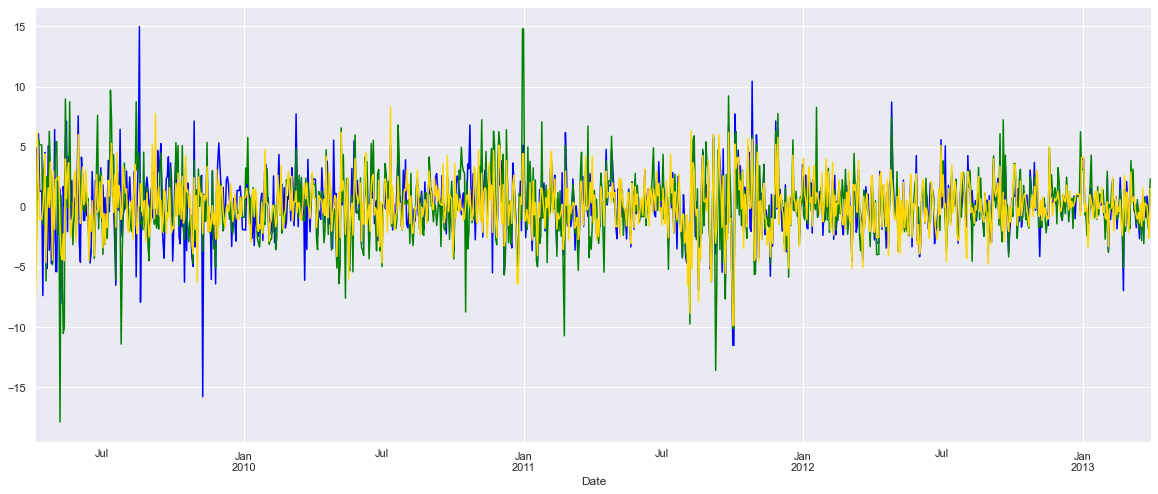

In [382]:
# Plotting the prices
df['ret_vol'][Start_date:end_date].plot(figsize= (20,8), color = "blue")
df['ret_por'][Start_date:end_date].plot(color = "green")
df['ret_bmw'][Start_date:end_date].plot(color = "gold")
plt.show()

In [ ]:
df['vol'][Start_date:end_date].plot(figsize= (20,8), color = "blue")
df['por'][Start_date:end_date].plot(color = "green")
df['bmw'][Start_date:end_date].plot(color = "gold")
plt.show()

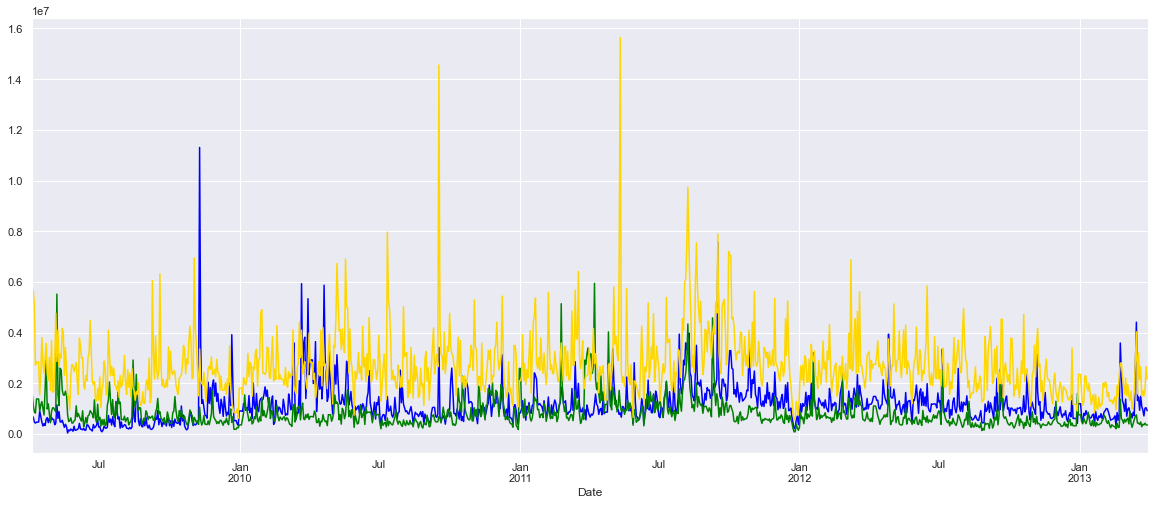

In [289]:
# Plotting the Volume of stocks traded
df['q_vol'][Start_date:end_date].plot(figsize= (20,8), color = "blue")
df['q_por'][Start_date:end_date].plot(color = "green")
df['q_bmw'][Start_date:end_date].plot(color = "gold")
plt.show()

In [290]:
# Correlation among the volume and closing prices
print('Correlation between the volume and closing prices among manufacturers from ' + str(Start_date) + ' to ' + str(end_date)+ '\n')
print('Volkswagen correlation: \t'+ str(df['vol'][Start_date:end_date].corr(df['q_vol'][Start_date:end_date])))
print('Porsche correlation: \t'+ str(df['por'][Start_date:end_date].corr(df['q_por'][Start_date:end_date])))
print('BMW correlation: \t\t'+ str(df['bmw'][Start_date:end_date].corr(df['q_bmw'][Start_date:end_date])))

Correlation between the volume and closing prices among manufacturers from 2009-04-05 to 2013-04-01

Volkswagen correlation: 	0.06875849722560681
Porsche correlation: 	-0.008526876552067153
BMW correlation: 		-0.04177966777889798


In [291]:

print('Correlation among manufacturers from ' + str(Start_date) + ' to ' + str(ann_date)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][Start_date:ann_date].corr(df['por'][Start_date:ann_date])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][Start_date:ann_date].corr(df['bmw'][Start_date:ann_date])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][Start_date:ann_date].corr(df['bmw'][Start_date:ann_date])))

Correlation among manufacturers from 2009-04-05 to 2012-07-05

Volkswagen and Porsche correlation: 	0.5728031573439353
Volkswagen and BMW correlation: 	0.9853719492870185
Porsche and BMW correlation: 		0.5343160041769243


In [292]:
print('Correlation among manufacturers from ' + str(ann_date) + ' to ' + str(end_date)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][ann_date:end_date].corr(df['por'][ann_date:end_date])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][ann_date:end_date].corr(df['bmw'][ann_date:end_date])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][ann_date:end_date].corr(df['bmw'][ann_date:end_date])))

Correlation among manufacturers from 2012-07-05 to 2013-04-01

Volkswagen and Porsche correlation: 	0.9480276542877291
Volkswagen and BMW correlation: 	0.9485194674449449
Porsche and BMW correlation: 		0.9562582481700985


In [293]:
print('Correlation among manufacturers from ' + str(end_date) + ' to ' + str(df.index[-1])+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][end_date:].corr(df['por'][end_date:])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][end_date:].corr(df['bmw'][end_date:])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][end_date:].corr(df['bmw'][end_date:])))

Correlation among manufacturers from 2013-04-01 to 2020-12-08 00:00:00

Volkswagen and Porsche correlation: 	0.9291393418345272
Volkswagen and BMW correlation: 	0.45955752441124337
Porsche and BMW correlation: 		0.4775004292104373


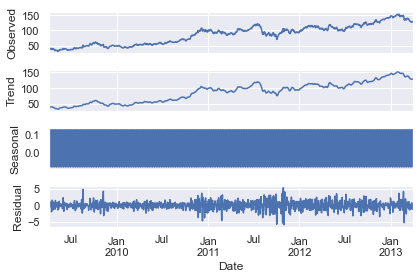

In [294]:
#Checking seasonality by decomposition
s_dec_vol= seasonal_decompose(df['vol'][Start_date:end_date],model = "additive")
s_dec_vol.plot()
plt.show()

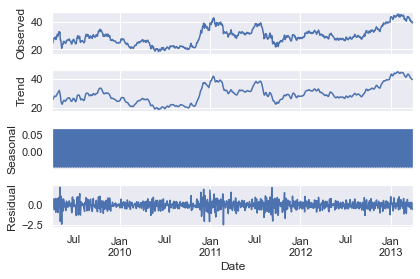

In [295]:
s_dec_por= seasonal_decompose(df['por'][Start_date:end_date],model = "additive")
s_dec_por.plot()
plt.show()

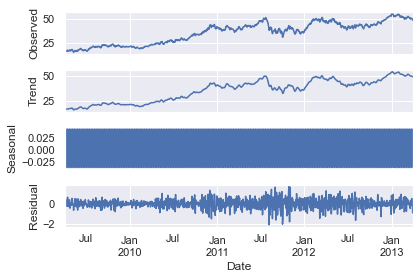

In [296]:
s_dec_bmw= seasonal_decompose(df['bmw'][Start_date:end_date],model = "additive")
s_dec_bmw.plot()
plt.show()

In [297]:
#Checking that data is stationary or not
sts.adfuller(df['vol'][Start_date:end_date]) #For volkswagon

(-1.1497586683426257,
 0.6948266203310209,
 11,
 1029,
 {'1%': -3.436720930946538,
  '5%': -2.8643528789984187,
  '10%': -2.56826769663245},
 4337.293283446319)

In [298]:
sts.adfuller(df['por'][Start_date:end_date]) #For porsche

(-2.19419278421089,
 0.20835988871019956,
 1,
 1039,
 {'1%': -3.436659460539809,
  '5%': -2.864325767240336,
  '10%': -2.5682532565554537},
 2456.8684058363324)

In [299]:
sts.adfuller(df['bmw'][Start_date:end_date]) #For BMW

(-1.3792432922177327,
 0.5921857062044683,
 3,
 1037,
 {'1%': -3.436671659540904,
  '5%': -2.8643311477003515,
  '10%': -2.5682561222519897},
 2330.4896761062046)

In [300]:
#Eliminating the trend to make data Stationary
#Using First Order Differencing
#dateparse= lambda dates: pd.datetimestrp.time(dates, '%Y-%m')
#y=df['vol'][Start_date:end_date].values

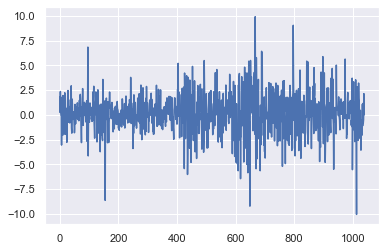

(-9.429560477701044,
 5.234455881871632e-16,
 10,
 1029,
 {'1%': -3.436720930946538,
  '5%': -2.8643528789984187,
  '10%': -2.56826769663245},
 4333.684410788135)

In [372]:
V = df['vol'][Start_date:end_date].values
diff = list()
for i in range(1, len(V)):
	value = V[i] - V[i - 1]
	diff.append(value)
plt.plot(diff)
plt.show()
sts.adfuller(diff)

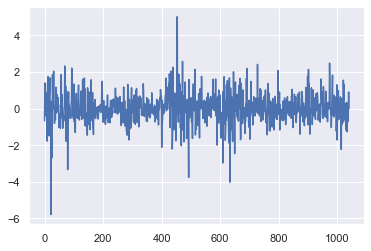

(-28.910394910882083,
 0.0,
 0,
 1039,
 {'1%': -3.436659460539809,
  '5%': -2.864325767240336,
  '10%': -2.5682532565554537},
 2404.310059629394)

In [371]:
P = df['por'][Start_date:end_date].values
diff = list()
for i in range(1, len(P)):
	value = P[i] - P[i - 1]
	diff.append(value)
plt.plot(diff)
plt.show()
sts.adfuller(diff)

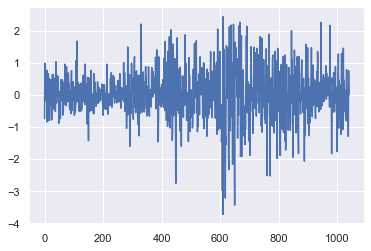

(-16.04393269727996,
 5.87288758115842e-29,
 4,
 1035,
 {'1%': -3.4366839058058387,
  '5%': -2.8643365489845647,
  '10%': -2.5682589990431515},
 2328.7396242106033)

In [370]:
B = df['bmw'][Start_date:end_date].values
diff = list()
for i in range(1, len(B)):
    value = B[i] - B[i - 1]
    diff.append(value)

plt.plot(diff)
plt.show()
sts.adfuller(diff)

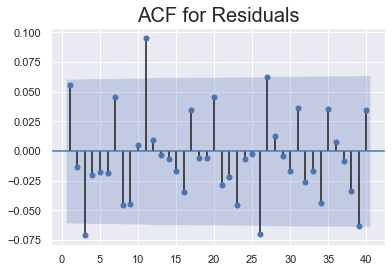

In [368]:
sgt.plot_acf(diff, unbiased= True, zero = False, lags=40)
plt.title("ACF for Residuals", size = 20)
plt.show()

In [304]:
def differencing():
    diff = list()
    for i in range(1, len(X)):
        value = X[i] - X[i - 1]
        diff.append(value)


In [305]:
diffe= differencing()

In [ ]:
#def adf_test(y):
    #Performing augmented dickey fuller test
    #print('Results of Augmented Dickey-Fuller test:')
    #dftest = adfuller(y, autolag='AIC')
    #dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of obs'])
    #for key, value in dftest[4].items():
        #dfoutput['Cr. Value ({})'.format(key)] = value
    #print(dfoutput)

In [ ]:
#adf_test(y)

In [ ]:
#y_diff = np.diff(y)

In [ ]:
#adf_test(y_diff)

In [ ]:
#def parser(x):
#    return datetime.strptime(x, '%Y-%m-%d')
 

In [ ]:
#dateparse= lambda dates: pd.datetimestrp.time(dates, '%Y-%m-%d')
#data = pd.read_csv('VOW3.DE.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=dateparse)

In [313]:
from matplotlib import pyplot

In [314]:
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')
 

In [315]:
series = pd.read_csv('VOW3.DE.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [316]:
series_vol= series.Close

In [317]:
# fit linear model
X = [i for i in range(0, len(series))]
X = np.reshape(X, (len(X), 1))
y = series_vol.values

In [318]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [319]:
trend= model.predict(X)

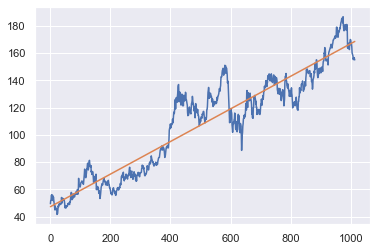

In [320]:
plt.plot(y)
plt.plot(trend)
plt.show()

In [321]:
detrend= [y[i]-trend[i] for i in range(0, len(series))]

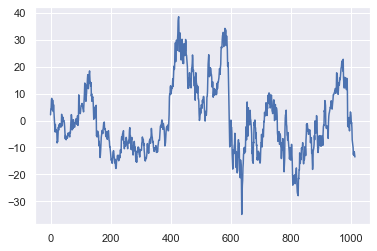

In [322]:
plt.plot(detrend)
plt.show()

In [323]:
porsche = pd.read_csv('PAH3.DE.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [324]:
porsche_por=porsche.Close

In [333]:
# fit linear model
A = [i for i in range(0, len(porsche_por))]
A = np.reshape(A, (len(A), 1))
b = porsche_por.values

In [334]:
model = LinearRegression()
model.fit(A,b)

LinearRegression()

In [335]:
trend1= model.predict(A)

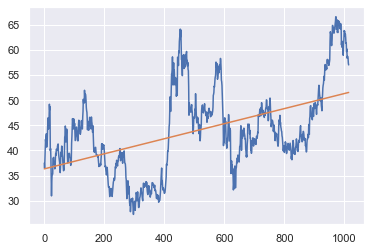

In [336]:
plt.plot(b)
plt.plot(trend1)
plt.show()

In [337]:
detrend1= [b[i]-trend1[i] for i in range(0, len(porsche_por))]

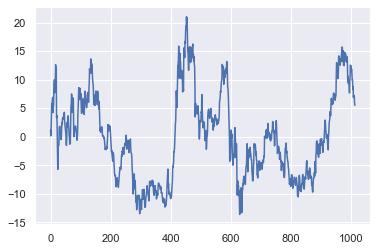

In [338]:
plt.plot(detrend1)
plt.show()

In [329]:
bmw= pd.read_csv('BMW.DE.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [330]:
bmw1= bmw.Close

Date
2009-04-06    25.014999
2009-04-07    23.910000
2009-04-08    25.385000
2009-04-09    26.020000
2009-04-14    25.745001
2009-04-15    25.705000
2009-04-16    26.030001
2009-04-17    27.180000
2009-04-20    25.920000
2009-04-21    25.830000
2009-04-22    26.240000
2009-04-23    26.230000
2009-04-24    27.209999
2009-04-27    27.190001
2009-04-28    25.985001
2009-04-29    26.750000
2009-04-30    26.250000
2009-05-04    26.850000
2009-05-05    27.490000
2009-05-06    28.195000
2009-05-07    27.760000
2009-05-08    26.660000
2009-05-11    25.490000
2009-05-12    24.920000
2009-05-13    23.805000
2009-05-14    24.754999
2009-05-15    24.620001
2009-05-18    25.320000
2009-05-19    26.250000
2009-05-20    26.035000
                ...    
2013-02-15    71.650002
2013-02-18    71.370003
2013-02-19    71.790001
2013-02-20    70.760002
2013-02-21    69.059998
2013-02-22    68.790001
2013-02-25    70.580002
2013-02-26    69.459999
2013-02-27    70.320000
2013-02-28    70.699997
2013-03-01 

In [346]:
# fit linear model
M = [i for i in range(0, len(bmw1))]
M = np.reshape(M, (len(M), 1))
n = bmw1.values

In [347]:
model = LinearRegression()
model.fit(M,n)

LinearRegression()

In [348]:
trend2= model.predict(M)

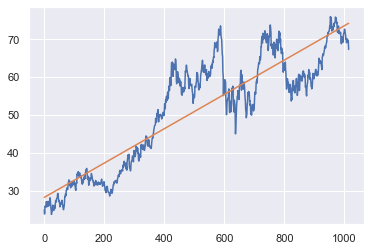

In [349]:
plt.plot(n)
plt.plot(trend2)
plt.show()

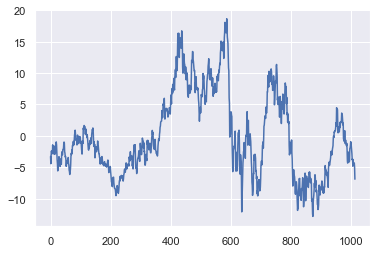

In [354]:
detrend2= [n[i]-trend2[i] for i in range(0, len(bmw1))]
plt.plot(detrend2)
plt.show()

In [355]:
sts.adfuller(detrend)

(-3.3772677874925727,
 0.011758656353323153,
 1,
 1013,
 {'1%': -3.436821814402523,
  '5%': -2.8643973728364043,
  '10%': -2.5682913948189823},
 4689.559792292976)

In [356]:
sts.adfuller(detrend1)

(-2.8442842391886765,
 0.052221202363947956,
 1,
 1013,
 {'1%': -3.436821814402523,
  '5%': -2.8643973728364043,
  '10%': -2.5682913948189823},
 3154.6447698052257)

In [357]:
sts.adfuller(detrend2)

(-2.4988591333130286,
 0.11575215677148026,
 3,
 1011,
 {'1%': -3.436834649927693,
  '5%': -2.864403033735098,
  '10%': -2.568294409927983},
 3018.7193487266923)

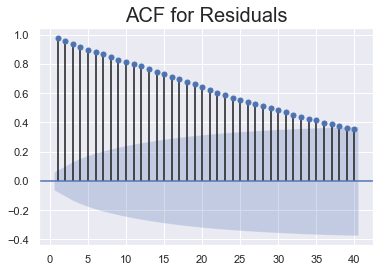

In [351]:
#ACF Plot for volkswagen
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(detrend, unbiased= True, zero = False, lags=40)
plt.title("ACF for Residuals", size = 20)
plt.show()

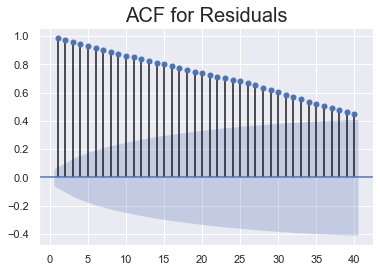

In [352]:
sgt.plot_acf(detrend1, unbiased= True, zero = False, lags=40)
plt.title("ACF for Residuals", size = 20)
plt.show()

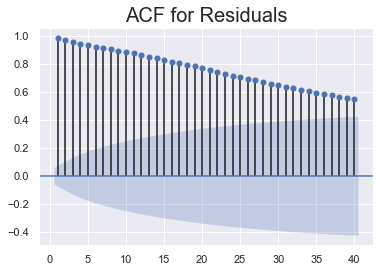

In [353]:
sgt.plot_acf(detrend2, unbiased= True, zero = False, lags=40)
plt.title("ACF for Residuals", size = 20)
plt.show()

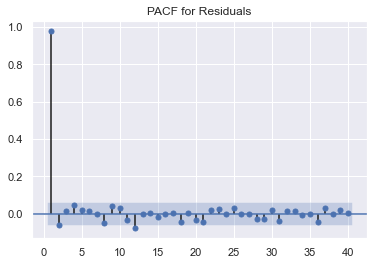

In [358]:
#PACF plot for volkswagen
sgt.plot_pacf(detrend, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Residuals")
plt.show()

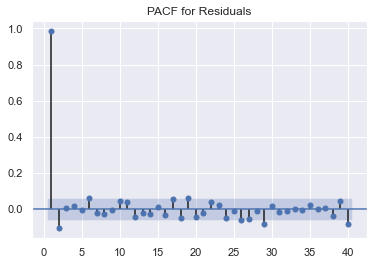

In [359]:
sgt.plot_pacf(detrend1, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Residuals")
plt.show()

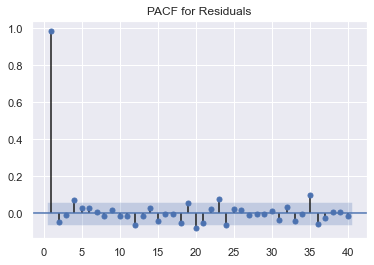

In [360]:
sgt.plot_pacf(detrend2, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Residuals")
plt.show()